# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [3]:
data['Direct_Bilirubin'].fillna(0, inplace = True)
data['Total_Bilirubin'].fillna(0, inplace = True)

In [8]:
direct = data['Direct_Bilirubin']
total = data['Total_Bilirubin']

In [9]:
direct = np.array(direct).reshape(-1,1)
total = np.array(total).reshape(-1,1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    direct,
    total,
    test_size = 0.2,
    random_state = 3
)

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
predicted_y = model.predict(X_test)

In [14]:
model.score(X_test, y_test)

0.9185229858613643

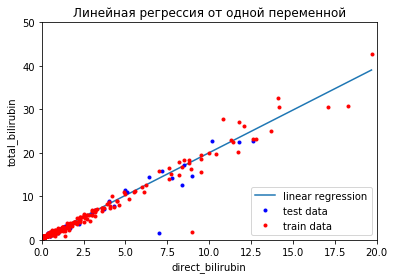

In [45]:
plt.xlabel('direct_bilirubin')
plt.ylabel('total_bilirubin')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
x = np.linspace(min(X_train), max(X_train), 100)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y, label = 'linear regression')
plt.plot(X_test, y_test, 'b.', label = 'test data')
plt.plot(X_train, y_train, 'r.', label = 'train data')
plt.xlim(0,20)
plt.ylim(0,50)
plt.legend()
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

print('Точность модели практически не изменилась:')
pol_reg.score(poly_reg.fit_transform(X_test), y_test)

Точность модели практически не изменилась:


0.9137737205201688

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

In [62]:
data.loc[(data.Gender == 'Male'), 'gender_type'] = 1
data.loc[(data.Gender == 'Female'), 'gender_type'] = 0

In [64]:
data.fillna(0, inplace = True)

In [65]:
X = data.drop(['Dataset', 'Gender'], axis=1)
y = data.Dataset

In [66]:
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [67]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [68]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

          1       0.74      0.95      0.83       102
          2       0.67      0.23      0.34        44

avg / total       0.72      0.73      0.68       146



Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

Корреляционная матрица, посчитанная для исходной таблицы:


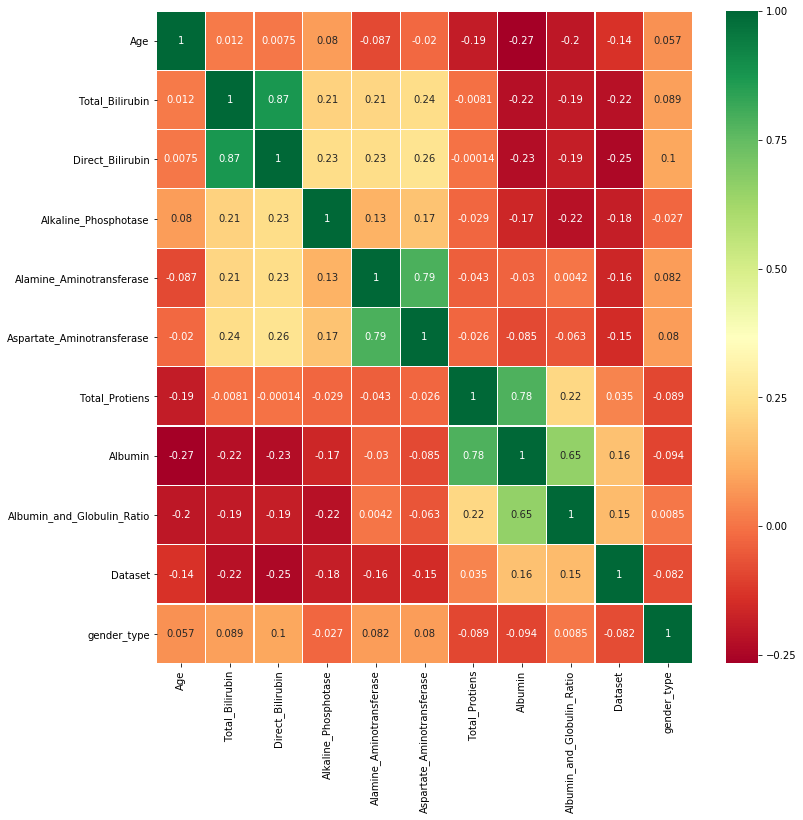

In [73]:
import seaborn as sns
print('Корреляционная матрица, посчитанная для исходной таблицы:')
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [78]:
X = data.drop(['Dataset', 'Age', 'Total_Protiens', 'gender_type', 'Gender'], axis=1)
y = data.Dataset

In [79]:
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [80]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [88]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print("Модель стала чуть-чуть лучше:")
print(classification_report(y_test, model_pred))

Модель стала чуть-чуть лучше:
             precision    recall  f1-score   support

          1       0.72      0.99      0.83       102
          2       0.80      0.09      0.16        44

avg / total       0.74      0.72      0.63       146



Посчитать квартили для всех колонок. 

In [90]:
data.quantile([0.25,0.5,0.75, 1.0])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,gender_type
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.92,1.0,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0,1.0
1.00,90.0,75.0,19.7,2110.0,2000.0,4929.0,9.6,5.5,2.80,2.0,1.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [116]:
old = data[data['Age'] >= 50][['Age', 'Dataset']] 
young = data[data['Age'] < 50][['Age','Dataset']]

C:\Users\Nikita\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nikita\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


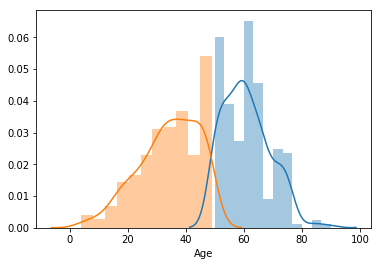

In [132]:
sns.distplot(old['Age'])
sns.distplot(young['Age'])

In [133]:
young['Age'].quantile([0.25,0.5,0.75, 1.0])

0.25    27.0
0.50    35.0
0.75    42.0
1.00    49.0
Name: Age, dtype: float64

In [140]:
young['Age'].mean()

34.18130311614731


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [134]:
disease = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(disease, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что total_bilirubin влияет на больных.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [135]:
disease = data[data['Dataset']==1]['Total_Bilirubin']
health = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(disease, health)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

Так как результат p-value больше 0.05, то мы **не** отвергаем нулевую гипотезу о том, что total_bilirubin влияет на Dataset.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [138]:
age_1 = data[data['Age'] <= 30]['Dataset']

age_2 = data[(data['Age'] > 30) | (data['Age'] <= 55)]['Dataset']

age_3 = data[data['Age']> 55]['Dataset']

stats.f_oneway(age_1, age_2, age_3)

F_onewayResult(statistic=6.539979434047715, pvalue=0.001518026778223392)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разных возрастов.

Вопросы задавать на почту yustiks@gmail.com